# comparison between thermionic and secondary electron spectra

In [1]:
from Modules import NecessaryVariables as nv
from Modules import TempPhysicalModels as tpm
from Modules import SecondaryElectrons as se

from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import quad

ParticleBank debug: ParticleFileName is: ParticleInfo/Default.txt


In [6]:
#enes = np.logspace(-3,1.2,30)  # energies in eV
enes = np.linspace(0.01,12,120)  # energies in eV

print(enes)

[1.00000000e-02 1.10756303e-01 2.11512605e-01 3.12268908e-01
 4.13025210e-01 5.13781513e-01 6.14537815e-01 7.15294118e-01
 8.16050420e-01 9.16806723e-01 1.01756303e+00 1.11831933e+00
 1.21907563e+00 1.31983193e+00 1.42058824e+00 1.52134454e+00
 1.62210084e+00 1.72285714e+00 1.82361345e+00 1.92436975e+00
 2.02512605e+00 2.12588235e+00 2.22663866e+00 2.32739496e+00
 2.42815126e+00 2.52890756e+00 2.62966387e+00 2.73042017e+00
 2.83117647e+00 2.93193277e+00 3.03268908e+00 3.13344538e+00
 3.23420168e+00 3.33495798e+00 3.43571429e+00 3.53647059e+00
 3.63722689e+00 3.73798319e+00 3.83873950e+00 3.93949580e+00
 4.04025210e+00 4.14100840e+00 4.24176471e+00 4.34252101e+00
 4.44327731e+00 4.54403361e+00 4.64478992e+00 4.74554622e+00
 4.84630252e+00 4.94705882e+00 5.04781513e+00 5.14857143e+00
 5.24932773e+00 5.35008403e+00 5.45084034e+00 5.55159664e+00
 5.65235294e+00 5.75310924e+00 5.85386555e+00 5.95462185e+00
 6.05537815e+00 6.15613445e+00 6.25689076e+00 6.35764706e+00
 6.45840336e+00 6.559159

In [7]:
therm3500 = tpm.ThermionicElectronSpectra(3500,enes)
sees = se.SecondaryElectronSpectrum(enes)
print(sees)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.014195936862233038, 0.09649940580136082, 0.17721415978922872, 0.2340040148207724, 0.2689009316728566, 0.2874975738794608, 0.29472807035241544, 0.29428453195122944, 0.28879027732726736, 0.28007271984936083, 0.2693937145327827, 0.25761982312796317, 0.245342662820651, 0.23296265138421837, 0.22074705949650827, 0.20887030861456798, 0.19744204583895175, 0.18652678894051902, 0.17615773218222566, 0.1663464852151231, 0.15708996294664232, 0.14837526822157207, 0.14018315295048892, 0.132490467739836, 0.12527188895464292, 0.11850112801578455, 0.1121517689013201, 0.10619783840752742, 0.10061418438931509, 0.09537671629660596, 0.09046254734742165, 0.08585006689526987, 0.0815189637491274, 0.07745021554056503, 0.07362605510539869, 0.07002992183114064, 0.06664640371238896, 0.06346117423568959, 0.06046092702558142, 0.05763331031003963, 0.054966862622956185, 0.05245095069260574, 0.050075710123411575, 0.04783198923071784

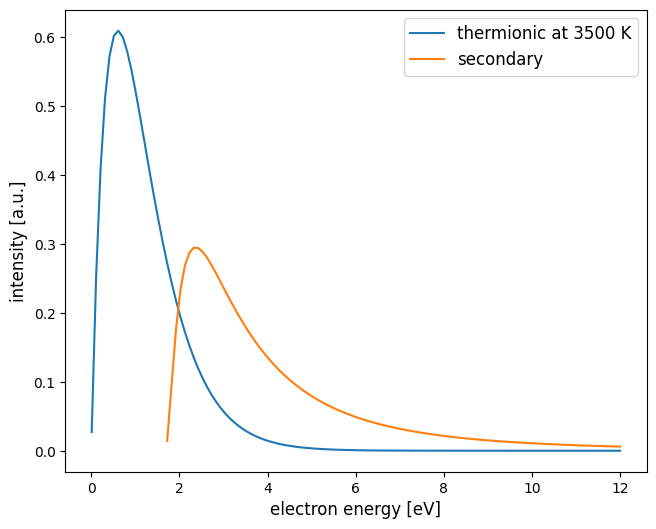

In [8]:
fig, ax = plt.subplots(1, figsize=(7.5,6))
ax.plot(enes,therm3500,label="thermionic at 3500 K")
ax.plot(enes,sees,label="secondary")
#ax.set_xscale('log')
ax.set_xlabel("electron energy [eV]",fontsize=12)
ax.set_ylabel("intensity [a.u.]",fontsize=12)

ax.legend(fontsize=12)


In [15]:
# integrate
#I = quad(therm3500, 0, 10)

itherm3500 = np.cumsum(therm3500)

#x = x[~numpy.isnan(x)]
#sees = np.array(sees)
#sees[np.isnan(sees)] = 0
sees=np.nan_to_num(sees)
isees = np.cumsum(sees)
print(isees)

itherm3500=[1.0-x/itherm3500[-1] for x in itherm3500]  # normalize
isees=[1.0-x/isees[-1] for x in isees]  # normalize

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01419594
 0.11069534 0.2879095  0.52191352 0.79081445 1.07831202 1.37304009
 1.66732463 1.9561149  2.23618762 2.50558134 2.76320116 3.00854382
 3.24150647 3.46225353 3.67112384 3.86856589 4.05509268 4.23125041
 4.39759689 4.55468686 4.70306213 4.84324528 4.97573575 5.10100764
 5.21950876 5.33166053 5.43785837 5.53847255 5.63384927 5.72431182
 5.81016189 5.89168085 5.96913106 6.04275712 6.11278704 6.17943345
 6.24289462 6.30335555 6.36098886 6.41595572 6.46840667 6.51848238
 6.56631437 6.61202567 6.65573142 6.69753945 6.7375508  6.77586019
 6.81255646 6.84772302 6.88143818 6.91377554 6.94480427 6.97458947
 7.00319241 7.03067077 7.05707892 7.08246812 7.10688672 7.13038034
 7.15299209 7.17476267 7.19573056 7.21593217 7.23540193 7.25417245
 7.27227459 7.28973764 7.30658932 7.32285595 7.33856249 7.35373266
 7.36838895

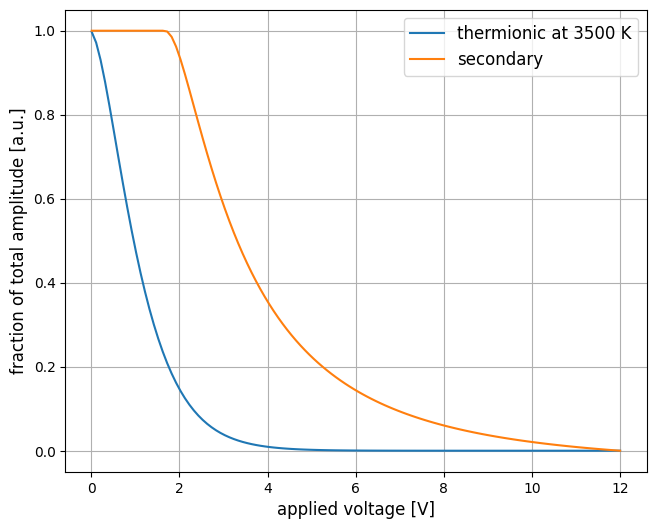

In [16]:
fig, ax = plt.subplots(1, figsize=(7.5,6))
ax.plot(enes,itherm3500,label="thermionic at 3500 K")
ax.plot(enes,isees,label="secondary")
#ax.set_xscale('log')
ax.set_xlabel("applied voltage [V]",fontsize=12)
ax.set_ylabel("fraction of total amplitude [a.u.]",fontsize=12)

ax.legend(fontsize=12)
ax.grid()